In [33]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
class Dataset(object):
    """An abstract class representing a Dataset.
    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """
 
    def __getitem__(self, index):
        raise NotImplementedError
 
    def __len__(self):
        raise NotImplementedError
 
    def __add__(self, other):
        return ConcatDataset([self, other])


In [ ]:
'''
class MyDataSet(Dataset):
    def __init__(self):
        self.sample_list = ...
 
    def __getitem__(self, index):
        x= ...
        y= ...
        return x, y
 
    def __len__(self):
        return len(self.sample_list)
'''

In [1]:
import os
path = 'Caltech101' 
classes = [i for i in os.listdir(path)]
classes

['eval', 'test', 'train']

In [4]:
import os
def make_txt_file(path):
    
    # Classes: train, eval, test
    classes = [i for i in os.listdir(path)]

    for i in classes:            
        s = 0
        dataset=open(path+'\\'+i+'.txt', 'w')
        typepath=os.path.join(path, i)
        typenames=os.listdir(typepath)

        for typename in typenames:
            imgpath=os.path.join(typepath,typename)
            imgnames=os.listdir(imgpath)

            for imgname in imgnames:        
                name = imgpath + '\\' + imgname + '-' + str(typenames.index(typename)) + '\n'  
                dataset.write(name)
        dataset.close()


In [5]:
from torch.utils.data import Dataset
 
class MyDataSet(Dataset):
    def __init__(self, dataset_type, transform=None, update_dataset=False):
        """
        dataset_type: [train, eval, test]
        """
 
        dataset_path = 'Caltech101'
 
        if update_dataset:
            make_txt_file(dataset_path)  # update datalist
 
        self.transform = transform
        self.sample_list = list()
        self.dataset_type = dataset_type
        f = open(dataset_path +'\\'+ self.dataset_type + '.txt','r')
        lines = f.readlines()
        for line in lines:
            self.sample_list.append(line.strip())
        f.close()
 
    def __getitem__(self, index):
        item = self.sample_list[index]
        img = Image.open(item.split('-')[0])
        if self.transform is not None:
            img = self.transform(img)
        label = int(item.split('-')[-1])
        return img, label
 
    def __len__(self):
        return len(self.sample_list)

In [41]:
mean = [0.5071, 0.4867, 0.4408]
stdv = [0.2675, 0.2565, 0.2761]

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomCrop(256,padding=32),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'eval': transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
        
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    }

In [42]:
train_data=MyDataSet('train',transform=data_transforms['train'])
eval_data=MyDataSet('eval',transform=data_transforms['eval'])
test_data=MyDataSet('test',transform=data_transforms['test'])

print('train:',train_data.__len__())
print('eval:',eval_data.__len__())
print('test:',test_data.__len__())


train: 6162
eval: 820
test: 1695


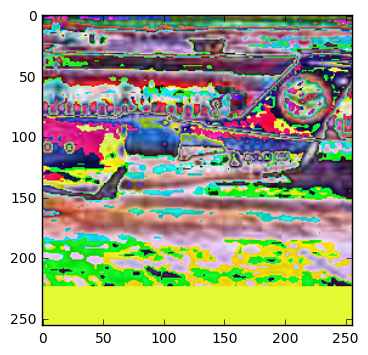

In [47]:
img,label=train_data.__getitem__(150)
plt.imshow(np.transpose(img.numpy(),(1,2,0)))
plt.show()